# Fashion MNIST dataset, an alternative to MNIST

In [ ]:
# import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
# star (*) - everything which comes in keras package

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


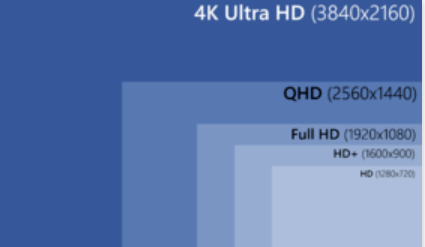

In [ ]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

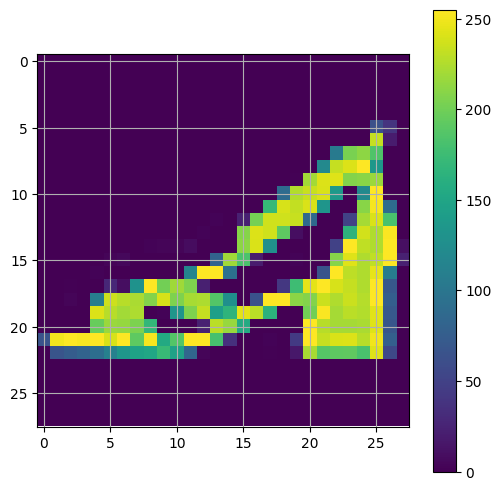

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[51000])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
# Normalize the image dataset
train_images = train_images/255.0
test_images = test_images/255.0

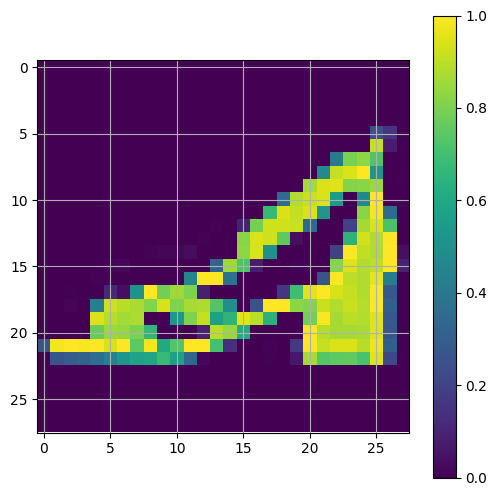

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[51000])
plt.colorbar()
plt.grid(True)
plt.show()

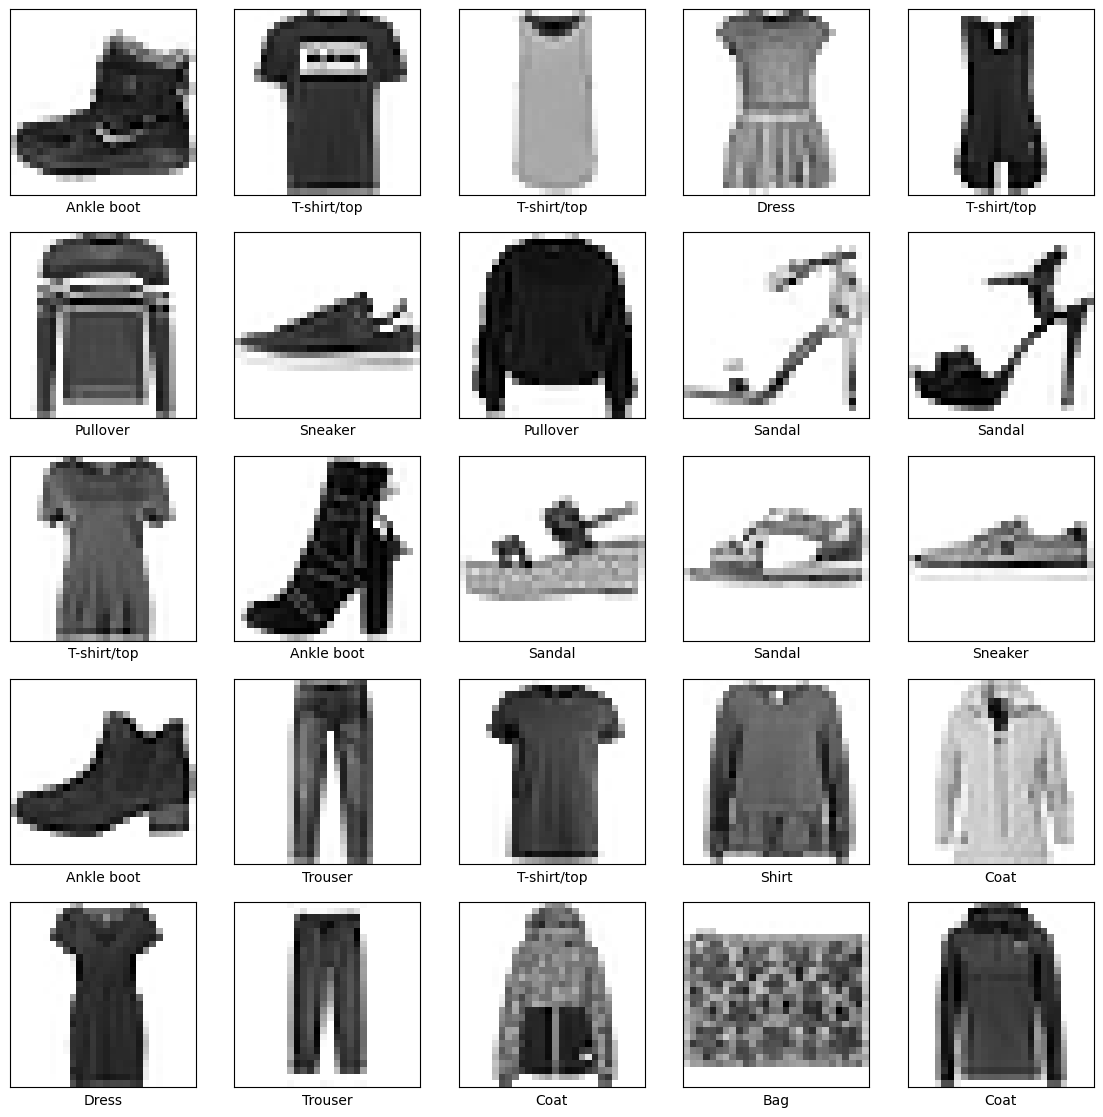

In [ ]:
plt.figure(figsize=(14,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(label_name[train_labels[i]])

plt.show()

# Building MLP - DNN

In [ ]:
model = Sequential()
# Convert 2D (metrics) to 1D(Vector) form
model.add(Flatten(input_shape=(28,28)))
# add 1st hidden layer
model.add(Dense(128, activation='relu'))
# add 2nd hidden layer
model.add(Dense(128, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))
# analyse model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784*128+128

100480

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# visualize - TensorBoard
import os
import datetime
logdir1 = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
print(logdir1)

logs/20230923-073611


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir1 $logdir1

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-09-23 07:36:16.106843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=64, epochs=10,
          callbacks=[tensorboard_callback])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 5s 5ms/step - loss: 0.5035 - accuracy: 0.8216 - val_loss: 0.4335 - val_accuracy: 0.8425
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3679 - accuracy: 0.8663 - val_loss: 0.3754 - val_accuracy: 0.8671
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3291 - accuracy: 0.8803 - val_loss: 0.3707 - val_accuracy: 0.8648
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3049 - accuracy: 0.8877 - val_loss: 0.3533 - val_accuracy: 0.8730
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2905 - accuracy: 0.8924 - val_loss: 0.3379 - val_accuracy: 0.8818
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2742 - accuracy: 0.8961 - val_loss: 0.3475 - val_accuracy: 0.8779
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2632 - accuracy: 0.9015 - val_loss: 0.3432 - val_accuracy: 0.8744
Epoch 8/10
938/93

In the exploration of the Fashion MNIST dataset for image classification, a critical observation was the role of image pixel size in the effectiveness of machine learning models. Each image in the dataset is represented in a grayscale format with a specific pixel resolution. Through this project, we discovered how the pixel size of an image directly impacts a machine's ability to accurately identify and classify it.

**Key Observations and Insights:**

**Pixel Size and Detail Level:**

The pixel size, essentially the image's resolution, determines the amount of detail an image holds. In our project, working with the standard resolution provided by the Fashion MNIST dataset, we observed that the images contained sufficient detail for the model to distinguish between different clothing items. This balance in resolution allowed the machine learning model to effectively learn from the data without being overwhelmed by unnecessary detail or hindered by too little information.

**Effect of Reducing Pixel Size:**

 Reducing the pixel size (or downscaling) images can lead to a loss of detail, making it more challenging for the model to identify distinguishing features between different classes. In extreme cases, essential characteristics of the clothing items might become indiscernible, leading to decreased accuracy in classification.

**Effect of Increasing Pixel Size:**

 Conversely, increasing the pixel size (or upscaling) can enhance detail but also introduces challenges. Larger images require more computational resources for processing and can introduce noise or irrelevant information, potentially complicating the model's learning process. Additionally, the benefits of increased detail diminish after a certain point, as the model's ability to interpret additional information plateaus.

**Optimal Pixel Size:**

 Through experimentation, we learned that there's an optimal pixel size for each classification task, where the model achieves the best balance between detail level and computational efficiency. For the Fashion MNIST dataset, the default resolution of the images was near this optimal point, demonstrating a well-designed dataset for learning and classification tasks.

**Conclusion:**

This project highlighted the critical balance between image resolution and model performance in machine learning tasks. By adjusting and understanding the impact of pixel size on image classification, we can tailor our machine learning models to achieve better accuracy and efficiency. The insights gained from this exploration emphasize the importance of dataset preparation in the machine learning workflow and the nuanced considerations that can significantly impact the outcome of a project.

